# **Taxi Tip Prediction using Scikit-Learn and Snap ML**


Temps nécessaire estimé : **30** minutes


## Objectives


Après avoir terminé cet atelier, vous serez capable de :


* Effectuer un prétraitement des données de base à l'aide de Scikit-Learn
* Modélisez une tâche de régression à l'aide des API Scikit-Learn et Snap ML Python
* Former un modèle de régresseur d'arbre de décision à l'aide de Scikit-Learn et Snap ML
* Exécutez l’inférence et évaluez la qualité des modèles formés


## Table des matières


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#dataset_analysis">Dataset Analysis</a></li>
        <li><a href="#dataset_preprocessing">Dataset Preprocessing</a></li>
        <li><a href="#dataset_split">Dataset Train/Test Split</a></li>
        <li><a href="#dt_sklearn">Build a Decision Tree Regressor model with Scikit-Learn</a></li>
        <li><a href="#dt_snap">Build a Decision Tree Regressor model with Snap ML</a></li>
        <li><a href="#dt_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Decision Tree Regressors</a></li>
    </ol>
</div>
<br>
<hr>


<div id="Introduction">
    <h2>Introduction</h2>
    <br>L'ensemble de données utilisé dans cette séance d'exercices est accessible au public ici : https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page (tous droits réservés par Taxi & Limousine Commission(TLC), Ville de New York). Les enregistrements de voyage en taxi jaune TLC de juin 2019 sont utilisés dans ce carnet. La prédiction du montant du pourboire peut être modélisée comme un problème de régression. Pour entraîner le modèle, vous pouvez utiliser une partie de l'ensemble de données d'entrée et les données restantes peuvent être utilisées pour évaluer la qualité du modèle entraîné. Tout d’abord, téléchargeons l’ensemble de données.
    <br>
</div>


In [1]:
!wget -nc https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv

File ‘yellow_tripdata_2019-06.csv’ already there; not retrieving.



In [ ]:
# Décommenter la ligne suivante, si l'on travaille localement
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/yellow_tripdata_2019-06.csv

Inscrivez-vous maintenant gratuitement [Enregistrer](http://cocl.us/ML0101EN-IBM-Offer-CC) pour mettre vos données sur le serveur d'IBM


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [2]:
!pip install snapml

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


Dans cette section, vous lirez l'ensemble de données dans une trame de données Pandas et visualiserez son contenu. Vous examinerez également certaines statistiques de données.
Remarque : Une trame de données Pandas est une structure de données tabulaire bidimensionnelle, à taille variable et potentiellement hétérogène. Pour plus d'informations: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.


In [2]:
raw_data = pd.read_csv('yellow_tripdata_2019-06.csv')
print("There are " + str(len(raw_data)) + " observations in the dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

raw_data.head()

There are 3936004 observations in the dataset.
There are 18 variables in the dataset.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-06-01 00:55:13   2019-06-01 00:56:17              1.0   
1         1  2019-06-01 00:06:31   2019-06-01 00:06:52              1.0   
2         1  2019-06-01 00:17:05   2019-06-01 00:36:38              1.0   
3         1  2019-06-01 00:59:02   2019-06-01 00:59:12              0.0   
4         1  2019-06-01 00:03:25   2019-06-01 00:15:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0         1.0                  N         145.0         145.0   
1            0.0         1.0                  N         262.0         263.0   
2            4.4         1.0                  N          74.0           7.0   
3            0.8         1.0                  N         145.0         145.0   
4            1.7         1.0                  N         113.0         148.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0          3.0    0.5      0.5        0.00           0.0   
1           2.0          2.5    3.0      0.5        0.00           0.0   
2           2.0         17.5    0.5      0.5        0.00           0.0   
3           2.0          2.5    1.0      0.5        0.00           0.0   
4           1.0          9.5    3.0      0.5        2.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3          4.30                   0.0  
1                    0.3          6.30                   2.5  
2                    0.3         18.80                   0.0  
3                    0.3          4.30                   0.0  
4                    0.3         15.95                   2.5

Chaque ligne de l'ensemble de données représente un trajet en taxi. Comme indiqué ci-dessus, chaque ligne comporte 18 variables. Une variable s'appelle tip_amount et représente la variable cible. Votre objectif sera de former un modèle qui utilise les autres variables pour prédire la valeur de la variable tip_amount. Nettoyons d'abord l'ensemble de données et récupérons les statistiques de base sur la variable cible.


There are 2712719 observations in the dataset.
There are 17 variables in the dataset.


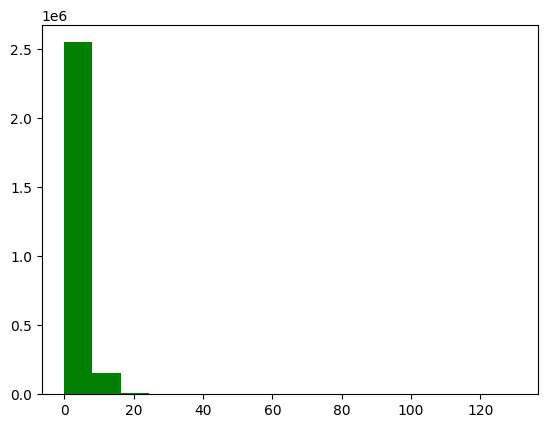

Minimum amount value is  0.01
Maximum amount value is  130.0
90% of the trips have a tip amount less or equal than  5.95


In [3]:
# Certains voyages indiquent 0 pourboire. On suppose que ces pourboires ont été payés en espèces.
# Pour cette étude, nous laissons tomber toutes ces lignes.
raw_data = raw_data[raw_data['tip_amount'] > 0]

# Nous avons également supprimé certaines valeurs aberrantes, à savoir celles où le pourboire était plus élevé que le prix du billet.
raw_data = raw_data[(raw_data['tip_amount'] <= raw_data['fare_amount'])]

# nous supprimons les trajets dont le coût tarifaire est très élevé
raw_data = raw_data[((raw_data['fare_amount'] >=2) & (raw_data['fare_amount'] < 200))]

# nous supprimons les variables qui contiennent la variable cible, à savoir le total_amount
clean_data = raw_data.drop(['total_amount'], axis=1)

# libérer la mémoire occupée par raw_data car nous n'en avons plus besoin
# nous avons affaire à un grand ensemble de données, nous devons donc nous assurer que nous ne manquons pas de mémoire
del raw_data
gc.collect()

print("There are " + str(len(clean_data)) + " observations in the dataset.")
print("There are " + str(len(clean_data.columns)) + " variables in the dataset.")

plt.hist(clean_data.tip_amount.values, 16, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(clean_data.tip_amount.values))
print("Maximum amount value is ", np.max(clean_data.tip_amount.values))
print("90% of the trips have a tip amount less or equal than ", np.percentile(clean_data.tip_amount.values, 90))

In [4]:
clean_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          1  2019-06-01 00:03:25   2019-06-01 00:15:42              1.0   
5          1  2019-06-01 00:28:31   2019-06-01 00:39:23              2.0   
7          1  2019-06-01 00:54:49   2019-06-01 01:02:57              2.0   
9          1  2019-06-01 00:29:12   2019-06-01 01:03:13              1.0   
10         2  2019-06-01 00:01:48   2019-06-01 00:16:06              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4            1.70         1.0                  N         113.0         148.0   
5            1.60         1.0                  N          79.0         125.0   
7            1.20         1.0                  N          79.0         249.0   
9            8.60         1.0                  N         186.0         243.0   
10           1.74         1.0                  N         107.0         148.0   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4            1.0          9.5    3.0      0.5        2.65           0.0   
5            1.0          9.5    3.0      0.5        1.00           0.0   
7            1.0          7.5    3.0      0.5        1.00           0.0   
9            1.0         31.5    3.0      0.5        7.05           0.0   
10           1.0         11.0    0.5      0.5        2.96           0.0   

    improvement_surcharge  congestion_surcharge  
4                     0.3                   2.5  
5                     0.3                   2.5  
7                     0.3                   2.5  
9                     0.3                   2.5  
10                    0.3                   2.5

En examinant l'ensemble de données plus en détail, nous constatons qu'il contient des informations telles que les dates/heures de prise en charge et de dépose, les lieux de prise en charge et de dépose, les types de paiement, le nombre de passagers déclaré par le conducteur, etc. un modèle ML, nous devrons prétraiter les données. Nous devons transformer les données dans un format qui sera correctement traité par les modèles. Par exemple, nous devons coder les caractéristiques catégorielles.


<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


Dans cette sous-section, vous préparerez les données pour la formation.

In [5]:
# Convertir les colonnes 'tpep_dropoff_datetime' et 'tpep_pickup_datetime' en objets datetime
clean_data['tpep_dropoff_datetime'] = pd.to_datetime(clean_data['tpep_dropoff_datetime'])
clean_data['tpep_pickup_datetime'] = pd.to_datetime(clean_data['tpep_pickup_datetime'])

# Extrait de l'heure de prise en charge et de dépose
clean_data['pickup_hour'] = clean_data['tpep_pickup_datetime'].dt.hour
clean_data['dropoff_hour'] = clean_data['tpep_dropoff_datetime'].dt.hour

# Extraire le jour de ramassage et de dépôt de la semaine (0 = lundi, 6 = dimanche)
clean_data['pickup_day'] = clean_data['tpep_pickup_datetime'].dt.weekday
clean_data['dropoff_day'] = clean_data['tpep_dropoff_datetime'].dt.weekday

# Calculer la durée du trajet en secondes
clean_data['trip_time'] = (clean_data['tpep_dropoff_datetime'] - clean_data['tpep_pickup_datetime']).dt.total_seconds()


first_n_rows = 600000
clean_data = clean_data.head(first_n_rows)

In [6]:
# certaines caractéristiques sont catégoriques, nous devons les encoder
# pour les encoder, nous utilisons l'encodage one-hot du package Pandas
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
proc_data = pd.get_dummies(clean_data, columns = get_dummy_col)


del clean_data
gc.collect()

4160

In [9]:
proc_data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
4   2019-06-01 00:03:25   2019-06-01 00:15:42              1.0           1.70   
5   2019-06-01 00:28:31   2019-06-01 00:39:23              2.0           1.60   
7   2019-06-01 00:54:49   2019-06-01 01:02:57              2.0           1.20   
9   2019-06-01 00:29:12   2019-06-01 01:03:13              1.0           8.60   
10  2019-06-01 00:01:48   2019-06-01 00:16:06              1.0           1.74   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4           9.5    3.0      0.5        2.65           0.0   
5           9.5    3.0      0.5        1.00           0.0   
7           7.5    3.0      0.5        1.00           0.0   
9          31.5    3.0      0.5        7.05           0.0   
10         11.0    0.5      0.5        2.96           0.0   

    improvement_surcharge  ...  pickup_day_4  pickup_day_5  pickup_day_6  \
4                     0.3  ...         False          True         False   
5                     0.3  ...         False          True         False   
7                     0.3  ...         False          True         False   
9                     0.3  ...         False          True         False   
10                    0.3  ...         False          True         False   

    dropoff_day_0  dropoff_day_1  dropoff_day_2  dropoff_day_3  dropoff_day_4  \
4           False          False          False          False          False   
5           False          False          False          False          False   
7           False          False          False          False          False   
9           False          False          False          False          False   
10          False          False          False          False          False   

    dropoff_day_5  dropoff_day_6  
4            True          False  
5            True          False  
7            True          False  
9            True          False  
10           True          False  

[5 rows x 575 columns]

In [7]:

proc_data = proc_data.drop(['tpep_dropoff_datetime'], axis=1)
proc_data = proc_data.drop(['tpep_pickup_datetime'], axis=1)


In [8]:
y = proc_data[['tip_amount']].values.astype('float32')

proc_data = proc_data.drop(['tip_amount'], axis=1)

X = proc_data.values

X = normalize(X, axis=1, norm='l1', copy=False)

print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (600000, 558) y.shape= (600000, 1)


<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Maintenant que l'ensemble de données est prêt à créer les modèles de classification, vous devez d'abord diviser l'ensemble de données prétraité en un sous-ensemble à utiliser pour entraîner le modèle (la rame) et un sous-ensemble à utiliser pour évaluer la qualité du modèle. (l'ensemble de test).


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (420000, 558) Y_train.shape= (420000, 1)
X_test.shape= (180000, 558) Y_test.shape= (180000, 1)


<div id="dt_sklearn">
    <h2>Build a Decision Tree Regressor model with Scikit-Learn</h2>
</div>


In [10]:
from sklearn.tree import DecisionTreeRegressor
sklearn_dt = DecisionTreeRegressor(max_depth=8, random_state=35)
t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  33.67622


<div id="dt_snapml">
    <h2>Build a Decision Tree Regressor model with Snap ML</h2>
</div>


In [11]:
from snapml import DecisionTreeRegressor

# contrairement à l'arbre de décision de sklearn, Snap ML offre un entraînement multithread CPU/GPU
# pour utiliser le GPU, il faut mettre le paramètre use_gpu à True
# snapml_dt = DecisionTreeRegressor(max_depth=4, random_state=45, use_gpu=True)

# pour définir le nombre de threads CPU utilisés au moment de l'apprentissage, il faut définir le paramètre n_jobs
# pour un résultat reproductible à travers plusieurs appels de fonction, fixer random_state à une valeur entière donnée
snapml_dt = DecisionTreeRegressor(max_depth=8, random_state=45, n_jobs=4)

t0 = time.time()
snapml_dt.fit(X_train, y_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  19.14370


<div id="dt_sklearn_snapml">
    <h2>Evaluate the Scikit-Learn and Snap ML Decision Tree Regressor Models</h2>
</div>


In [12]:
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))
sklearn_pred = sklearn_dt.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))
snapml_pred = snapml_dt.predict(X_test)
snapml_mse = mean_squared_error(y_test, snapml_pred)
print('[Snap ML] MSE score : {0:.3f}'.format(snapml_mse))

[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : 1.76x 
[Scikit-Learn] MSE score : 1.732
[Snap ML] MSE score : 1.680


Comme indiqué ci-dessus, les deux modèles d'arbre de décision fournissent le même score sur l'ensemble de données de test. Cependant, Snap ML exécute la routine de formation plus rapidement que Scikit-Learn. C'est l'un des avantages de l'utilisation de Snap ML : accélération de la formation des modèles de machine learning classiques, tels que les modèles linéaires et arborescents.


## Practice


Entraîneons un régresseur d'arbre de décision SnapML avec le paramètre max_degree défini sur 12, random_state défini sur 45 et n_jobs défini sur 4 et comparons son erreur quadratique moyenne au régresseur d'arbre de décision que nous avons formé précédemment.

Commencez par créer et entraîner l’arbre de décision

<details><summary>Click here for the solution</summary>

```python    
tree = DecisionTreeRegressor(max_depth=12, random_state=45, n_jobs=4)

tree.fit(X_train, y_train)

```

</details>


Calculez maintenant l'erreur quadratique moyenne sur les données de test

<details><summary>Click here for the solution</summary>

```python    
pred = tree.predict(X_test)

print("MSE: ", mean_squared_error(y_test, pred))

```

</details>


Nous avons appris qu'augmenter le paramètre « max_degree » à « 12 » augmente le MSE